# Introduction Neural Networks

## Task 2.1

Given the function of $f_1(x) = 3x³ - 2x$, optimal values for w1 to w4 are as follows:  

    w0 =  0  
    w1 = -2  
    w2 =  0  
    w3 =  3  
    
Resulting in $0x⁰ - 2x¹ + 0x² + 3x³ = 3x³ - 2x¹ = y$

### Preparing the data

Below we are inserting the data into the script and putting it into the right format.

In [1]:
#%matplotlib notebook
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

In [2]:
offset = [-1 for x in range(9)]
X_full = [offset, [-1, -3/4, -1/2, -1/4, 0, 1/4, 1/2, 3/4, 1]]
X_full = np.matrix(X_full).T
Y_full = [-1, 0.1, 0.6, 0.5, -0.05, -0.5, -0.7, -0.2, 1]
Y_full = np.matrix(Y_full).T

In [3]:
X = X_full[:4, :]
Y = Y_full[:4, :]

print(X, "\n")
print(Y)

[[-1.   -1.  ]
 [-1.   -0.75]
 [-1.   -0.5 ]
 [-1.   -0.25]] 

[[-1. ]
 [ 0.1]
 [ 0.6]
 [ 0.5]]


### Optimizing $\vec\omega_*$

In linear regression, the prediction function is defined as

$$f(\vec{x}) = \vec\omega^\top \vec{x} - \theta$$

where $\theta$ is the y-offset of the linear regression. We can now hide the $\theta$ in $\vec\omega_*$ like this:

$$f(\vec{x}) = \vec\omega_*^\top \vec{x}_*$$

where $\vec\omega_* = \left\lgroup \matrix{\theta \cr \vec\omega} \right\rgroup $ and   $\vec{x}_* = \left\lgroup \matrix{-1 \cr \vec{x}} \right\rgroup $

This means we can solve the linear regression by calculating $\vec\omega_*$. Luckily, this is possible using following simple formula:

$$\vec\omega_* = pseudoinverse(\vec{x}_*) * \vec{y}$$ (where $\vec{y} = f(x)$)

`numpy` offers the pseudoinverse, so to calculate $\vec\omega_*$, all we need is:

In [4]:
w = np.linalg.pinv(X) * Y

Now we can take the values for $\omega$ and $\theta$ and insert them into 
$f(\vec{x}) = \vec\omega^\top \vec{x} - \theta$
which gives us the linear regression.

In [5]:
theta, omega = w.tolist()

theta = round(theta[0], 3)
omega = round(omega[0], 3)

print(f"omega = {omega}, theta = {theta}\n")

print(f"f(x) = {omega}x{'+' if theta < 0 else '-'}{abs(theta)}")

omega = 2.0, theta = -1.3

f(x) = 2.0x+1.3


Therefore the formula of our linear regression is as follows:

$f_2(x)=2x+1.3$

Now lets plot both $f_1$ and $f_2$ to confirm a correct linear regression

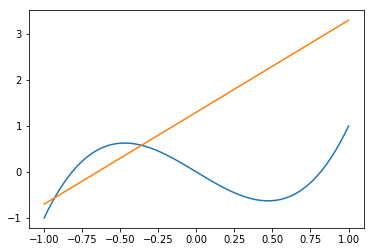

In [6]:
def f1(x):
    return 3*x**3 -2*x

def f2(x):
    return 2*x+1.3

def plot_function(function, value_range):
    plt.plot(value_range, [function(x) for x in value_range])

    
x_values = np.linspace(-1,1,100)

plot_function(f1, x_values)
plot_function(f2, x_values)

As we can see, our regression is not very good after training it only with 4 values.
However, so far we have only used part of the dataset to generate the linear regression. What happens when we use the whole dataset?

In [7]:
w2 = np.linalg.pinv(X_full) * Y_full

theta, omega = w2.tolist()

theta = round(theta[0], 3)
omega = round(omega[0], 3)

print(f"omega = {omega}, theta = {theta}\n")

print(f"f(x) = {omega}x{'+' if theta < 0 else '-'}{abs(theta)}")

omega = 0.233, theta = 0.028

f(x) = 0.233x-0.028


Now lets graph this regression against the original input

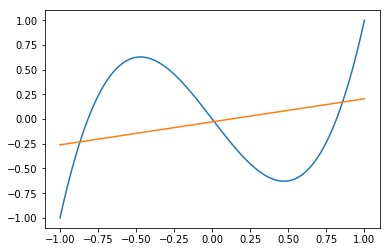

In [8]:
def f3(x):
    return 0.233*x-0.028

plot_function(f1, x_values)
plot_function(f3, x_values)

Way better!